# Chart 1: Ajovy

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
ajovy_columns = ["migraine days reduced", "monthly ajovy", "quarterly ajovy", "placebo"]
ajovy_data = [["0-", 15, 16, 26], ["2", 14, 14, 19],
             ["4", 18, 21, 19], ["6", 18, 14, 15], ["8", 15, 15, 9],
             ["10", 8, 10, 6], ["12", 7, 5, 3], ["14", 3, 3, 2],
             ["16", 1, 1, 0.5], ["17+", 1, 1, 0.5]]

In [12]:
ajovy_df = pd.DataFrame(ajovy_data, columns = ajovy_columns)
ajovy_df

,migraine days reduced,monthly ajovy,quarterly ajovy,placebo
0,0-,15,16,26.0
1,2,14,14,19.0
2,4,18,21,19.0
3,6,18,14,15.0
4,8,15,15,9.0
5,10,8,10,6.0
6,12,7,5,3.0
7,14,3,3,2.0
8,16,1,1,0.5
9,17+,1,1,0.5


In [17]:
melted_df = ajovy_df.melt(id_vars = "migraine days reduced")
melted_df.head()

,migraine days reduced,variable,value
0,0-,monthly ajovy,15.0
1,2,monthly ajovy,14.0
2,4,monthly ajovy,18.0
3,6,monthly ajovy,18.0
4,8,monthly ajovy,15.0


<Axes: xlabel='migraine days reduced', ylabel='value'>

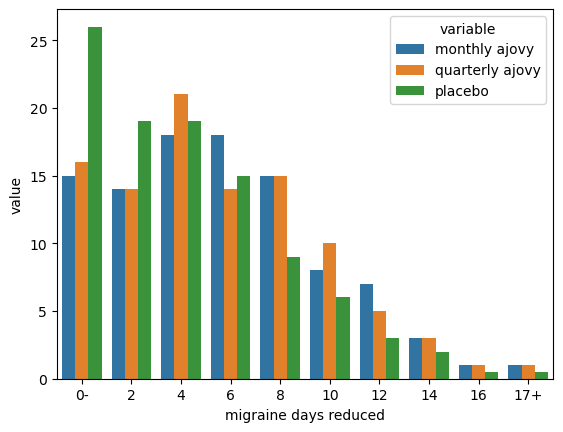

In [49]:
sns.set_style({"ytick.color":"white"})sns.barplot(data = melted_df, hue = "variable", y = "value", x = "migraine days reduced")

In [231]:
shrunk_buckets = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
shrunk_monthly = list(zip(shrunk_buckets, melted_df["value"].loc[melted_df["variable"] == "monthly ajovy"]))
shrunk_placebo = list(zip(shrunk_buckets, melted_df["value"].loc[melted_df["variable"] == "placebo"]))
print((shrunk_monthly))

[(0, 15.0), (1, 14.0), (2, 18.0), (3, 18.0), (4, 15.0), (5, 8.0), (6, 7.0), (7, 3.0), (8, 1.0), (9, 1.0)]


In [270]:
melted_df["variable"] = melted_df["variable"].apply(lambda x: x.title())
melted_df.head()

,migraine days reduced,variable,value,vsriable
0,0-,Monthly Ajovy,15.0,Monthly Ajovy
1,2,Monthly Ajovy,14.0,Monthly Ajovy
2,4,Monthly Ajovy,18.0,Monthly Ajovy
3,6,Monthly Ajovy,18.0,Monthly Ajovy
4,8,Monthly Ajovy,15.0,Monthly Ajovy


C:\Users\lunam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


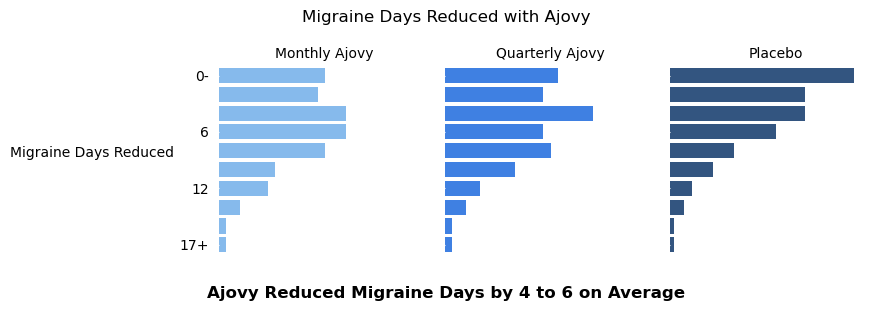

In [342]:
sns.set_style({"xtick.color":"white"})
sns.set_style({"ytick.color":"white"})
sns.set_style({"ytick.labelcolor": "black"})
facet_grid = sns.FacetGrid(data = melted_df, col = "variable", hue = "variable", palette = ["xkcd:sky blue", "xkcd:clear blue", "xkcd:dusk blue"])
facet_grid.map(sns.barplot, "value", "migraine days reduced")
facet_grid.despine(bottom = True, left = True)
facet_grid.set_xlabels("")
facet_grid.set_xticklabels([])
facet_grid.set_ylabels("Migraine Days Reduced", rotation = 0, horizontalalignment = "right")
facet_grid.set(yticks = [0, 3, 6, 9])
facet_grid.set_yticklabels(["0-", "6", "12", "17+"], color = "black")
facet_grid.fig.suptitle("Migraine Days Reduced with Ajovy")
facet_grid.fig.supxlabel("Ajovy Reduced Migraine Days by 4 to 6 on Average", fontweight = "bold")
facet_grid.fig.subplots_adjust(top = 0.1, bottom = 0)
facet_grid.set_titles(col_template = "{col_name}")
plt.tight_layout(pad = 1)

plt.savefig("Ajovy Chart")

<Axes: xlabel='value', ylabel='migraine days reduced'>

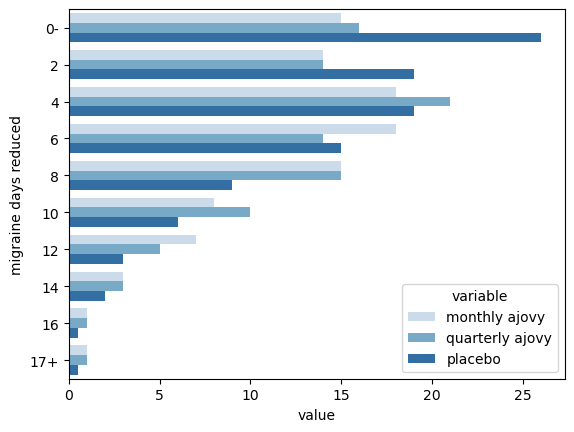

In [155]:
sns.barplot(data = melted_df, y = "migraine days reduced", x = "value", hue = "variable", palette = "Blues")

# Chart 2: Ozempic

In [273]:
titles = ["Medication", "Mentions"]
ozempic_data = [("Ozempic", 147800), ("Wegovy", 120100), ("Mounjaro", 45300), ("Trulicity", 22600), ("Saxenda", 16300), ("Rybelsus", 13500)]

In [274]:
ozempic_df = pd.DataFrame(ozempic_data, columns = titles)
ozempic_df.head()

,Medication,Mentions
0,Ozempic,147800
1,Wegovy,120100
2,Mounjaro,45300
3,Trulicity,22600
4,Saxenda,16300


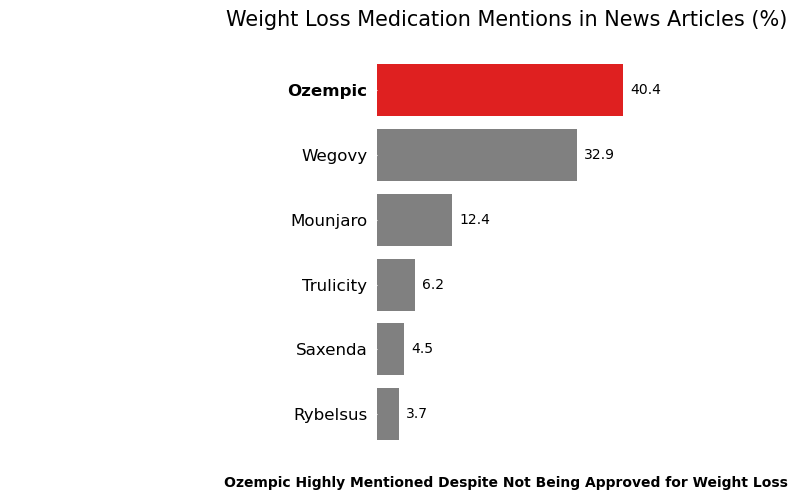

In [373]:
sns.set_style({"ytick.color":"white"})
max_mentions = max(ozempic_df["Mentions"])
all_mentions = sum(ozempic_df["Mentions"])
plot = sns.barplot(data = ozempic_df, y = "Medication", x = "Mentions", palette = ["gray" if mention != max_mentions else "red" for mention in ozempic_df["Mentions"]])
plot.set_title("Weight Loss Medication Mentions in News Articles (%)\n", size = 15)
plot.set_yticklabels(list(ozempic_df["Medication"]), color = "black", horizontalalignment = "right", size = 12)
for tick in plot.get_yticklabels():
    if tick.get_text() == "Ozempic":
        tick.set_weight("bold")
plot.set_ylabel("                                         ", rotation = 0, horizontalalignment = "right", size = 15)
plot.set_xlabel("Ozempic Highly Mentioned Despite Not Being Approved for Weight Loss", fontweight = "bold")
plot.bar_label(plot.containers[0], labels = [f"{round(100*(value/all_mentions),1)}" for value in ozempic_df["Mentions"]], padding = 5)
sns.despine(left = True, bottom = True)
plt.tight_layout(pad = 0)

plt.savefig("OzempicChart", bbox_inches = "tight")

# Chart 3: Kroger

In [376]:
sales_labels = ["Non-Perishable", "Perishable", "Fuel", "Pharmacy", "Other"]
sales_numbers = [74121, 35433, 18632, 13377, 6695]
df_labels = ["label", "revenue"]

In [378]:
sales_df = pd.DataFrame(list(zip(sales_labels, sales_numbers)), columns = df_labels)
sales_df

,label,revenue
0,Non-Perishable,74121
1,Perishable,35433
2,Fuel,18632
3,Pharmacy,13377
4,Other,6695


In [449]:
sns.set_style({"ytick.color":"black"})
sns.set_style({"xtick.color":"black"})
data = sales_df.groupby("label").sum().sort_values("revenue", ascending = False).T
print(data.columns)

Index(['Non-Perishable', 'Perishable', 'Fuel', 'Pharmacy', 'Other'], dtype='object', name='label')


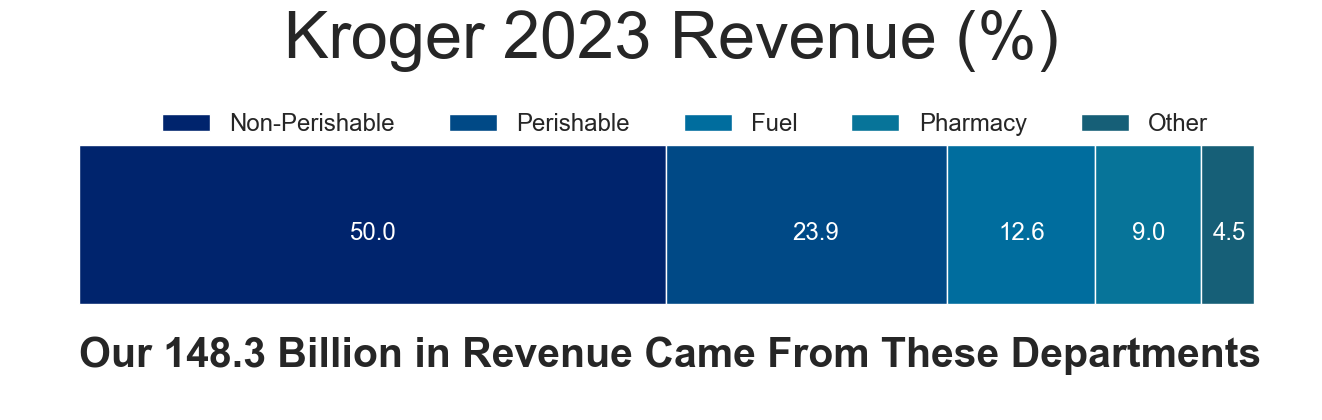

In [920]:

total_revenue = sum(sales_df["revenue"])
sns.set_style({"ytick.color":"white", "xtick.color":"white"})
plot = data.plot(kind = "barh", stacked = True, figsize=(14,4), ylabel = "", xlabel = "")
sns.set(palette = "ocean_d", style = "white")
plot.set_title(label = "Kroger 2023 Revenue (%)", size = 48, loc = "center", y = 1, x = 0.48)
plot.text(s = "Our 148.3 Billion in Revenue Came From These Departments", fontweight = "bold", size = 29.5, y = -0.45, x = -1)
sns.set_style({"axes.background":"white"})
sns.despine(left = True, bottom = True)

def addlabels(x):
    the_x = [37000, 93000, 119000, 135000, 145200]
    for i in range(len(x)):
        plt.text(the_x[i], -0.05, round(100*x[i]/total_revenue,1), ha = 'center', fontsize = "x-large", color = "white")

addlabels(sales_df["revenue"])
plot.legend(ncol=5, bbox_to_anchor=(0.05, 0.92), frameon = False, columnspacing = 2.25,
              loc='upper left', fontsize='x-large')
plt.tight_layout(pad = 0)
plt.show()

fig = plot.get_figure()
fig.savefig("Kroger Chart", bbox_inches = "tight")